In [2]:
from PIL import Image, ImageDraw, ImageEnhance
import random
import numpy as np
import math
from matplotlib import pyplot as plt

In [3]:
def find_coeffs(source_coords, target_coords):
    matrix = []
    for s, t in zip(source_coords, target_coords):
        matrix.append([t[0], t[1], 1, 0, 0, 0, -s[0]*t[0], -s[0]*t[1]])
        matrix.append([0, 0, 0, t[0], t[1], 1, -s[1]*t[0], -s[1]*t[1]])
    A = np.matrix(matrix, dtype=float)
    B = np.array(source_coords).reshape(8)
    res = np.dot(np.linalg.inv(A.T * A) * A.T, B)
    return np.array(res).reshape(8)

In [4]:
img = Image.open("waldo_1.png")
def get_rand_coor(img, factor, offset=0):
    c1 = [(0+offset,0+offset), (0+offset, img.size[1]-offset), (img.size[0]-offset, 0+offset), (img.size[0]-offset, img.size[1]-offset)]
    c2 = []
    noise1_1 = random.randint(0,img.size[0]//factor)
    noise1_2 = random.randint(0, img.size[1]//factor)
    noise2_1 = random.randint(0, img.size[0]//factor)
    noise2_2 = random.randint(-img.size[1]//factor,0)
    noise3_1 = random.randint(-img.size[0]//factor, 0)
    noise3_2 = random.randint(0, img.size[1]//factor)
    noise4_1 = random.randint(-img.size[0]//factor, 0)
    noise4_2 = random.randint(-img.size[1]//factor, 0)
    c2 = [(c1[0][0]+noise1_1, c1[0][1]+noise1_2),
          (c1[1][0]+noise2_1, c1[1][1]+noise2_2),
          (c1[2][0]+noise3_1, c1[2][1]+noise3_2),
          (c1[3][0]+noise4_1, c1[3][1]+noise4_2)]
    return c1, c2

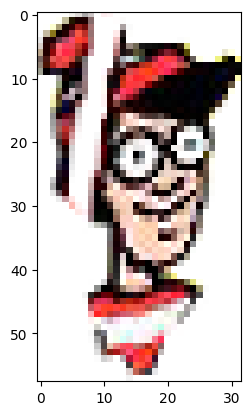

In [5]:
def generate_new_wally(img, rotate=0, scale = 1):
    c1, c2 = get_rand_coor(img,8)
    coeffs = find_coeffs(c1,c2)
    im_n = img.transform(img.size, Image.PERSPECTIVE, coeffs,
                  Image.BICUBIC)
    rotate = random.randint(-rotate, rotate)
    im_n = im_n.rotate(rotate)
    if scale > 1:
        scale = random.uniform(1, scale)
        im_n = im_n.resize((math.floor(im_n.size[0]*scale), math.floor(im_n.size[1]*scale)), Image.Resampling.LANCZOS)
    im_n = im_n.crop(im_n.getbbox())
    return im_n
im_n = generate_new_wally(img, rotate=5, scale=1)
plt.imshow(im_n)

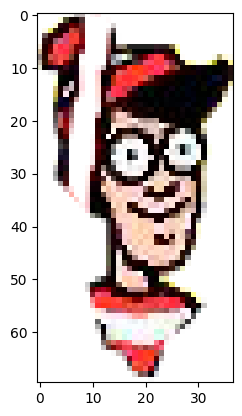

In [21]:
plt.imshow(img)

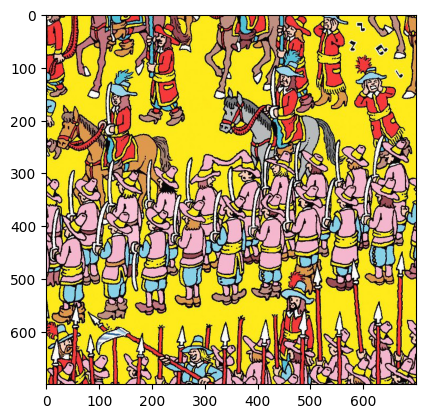

In [9]:
def gen_new_image(wally, background, rotate=0, scale=1, size=500):
    background = Image.open(background)
    wally = Image.open(wally)
    wally = generate_new_wally(wally, rotate=rotate, scale=scale)
    #wally = wally.crop(wally.getbbox())
    x = random.randint(0, background.size[0] - size)
    y = random.randint(0, background.size[1] - size)
    background = background.crop((x,y,x+size,y+size))
    x = random.randint(0, background.size[0] - wally.size[0])
    y = random.randint(0, background.size[1] - wally.size[1])
    background.paste(wally, (x,y), wally)
    background1 = ImageDraw.Draw(background)
    mid_x = (x + x+wally.size[0])/2
    mid_x = mid_x / background.size[0]
    mid_y = (y + y+wally.size[1])/2
    mid_y = mid_y/background.size[1]
    height = wally.size[1]/background.size[1]
    width = wally.size[0]/background.size[0]
    
    annotation = [0, mid_x, mid_y, width, height]
    #background1.rectangle([(x,y), (x+wally.size[0], y+wally.size[1])], outline='#80ee80', width=5)
    #background.show()
    return background, annotation

def rcnn_new_image(wally, background, rotate=0, scale=1, size=500):
    background = Image.open(background)
    wally = Image.open(wally)
    wally = generate_new_wally(wally, rotate=rotate, scale=scale)
    x = random.randint(0, background.size[0] - size)
    y = random.randint(0, background.size[1] - size)
    background = background.crop((x,y,x+size,y+size))
    x = random.randint(0, background.size[0] - wally.size[0])
    y = random.randint(0, background.size[1] - wally.size[1])
    background.paste(wally, (x,y), wally)
    background1 = ImageDraw.Draw(background)
    mid_x = (x + x+wally.size[0])/2
    mid_x = mid_x / background.size[0]
    mid_y = (y + y+wally.size[1])/2
    mid_y = mid_y/background.size[1]
    height = wally.size[1]/background.size[1]
    width = wally.size[0]/background.size[0]
    
    annotation = [x, y, x+wally.size[0], y+wally.size[0]]
    #background1.rectangle([(x,y), (x+wally.size[0], y+wally.size[1])], outline='#80ee80', width=5)
    #background.show()
    return background, annotation


def gen_new_bg(background, size=500):
    background = Image.open(background)
    x = random.randint(0, background.size[0] - size)
    y = random.randint(0, background.size[1] - size)
    background = background.crop((x,y,x+size,y+size))
    return background
plt.imshow(gen_new_bg('waldo_less/1.png', size=700))

In [8]:
scale = random.choice([1,2,2,3])
bg, annotation = gen_new_image('waldo_3.png', 'waldo_less/1.png', rotate=10, scale=scale, size=700)

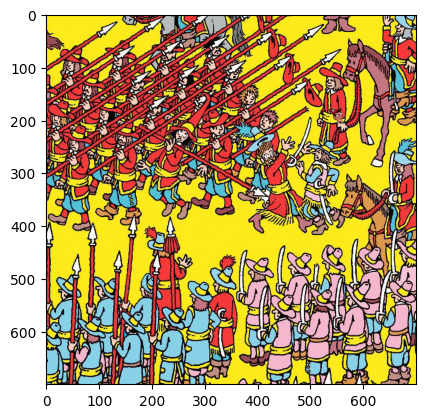

In [9]:
plt.imshow(bg)

In [16]:
waldos = ["waldo_1.png","waldo_2.png","waldo_3.png","waldo_4.png","waldo_5.png", "waldo_6.png", "waldo_7.png", "waldo_8.png"]
bgs = ["waldo_less/1.png", "waldo_less/2.png", "waldo_less/3.png", "waldo_less/4.png", "waldo_less/5.png", "waldo_less/6.png", "waldo_less/7.png", "waldo_less/8.png"]
idx = 0
for idx in tqdm(range(2250, 2300)):
    waldo = random.choice(waldos)
    scale = random.choice([1,1,1,2,2,3])
    background = random.choice(bgs)
    '''
    img, annotation = gen_new_image(waldo, background, rotate=10, scale=1, size=700)
    with open(f'datasets/labels/test/{idx}.txt', mode='w')as f:
        f.write(f'{annotation[0]} {annotation[1]} {annotation[2]} {annotation[3]} {annotation[4]}')
   '''
    img = gen_new_bg(background, size=700)
    img.save(f'datasets/images/test/{idx}.png')

100%|███████████████████████████████████████████| 50/50 [00:05<00:00,  9.39it/s]


In [10]:
from tqdm import tqdm

In [34]:
def test_annotation(image, annotation_file):
    image = Image.open(image)
    with open(annotation_file) as f:
        with open(annotation_file, "r") as file:
            annotation_list = file.read().split(' ')
            print(annotation_list)
            annotation_list = [float(y) for y in annotation_list]
        w, h = image.size
        plotted_image = ImageDraw.Draw(image)
        annotations = np.array(annotation_list)
        print(annotations)
        transformed_annotations = np.copy(annotations)
        transformed_annotations[[1,3]] = annotations[[1,3]] * w
        transformed_annotations[[2,4]] = annotations[[2,4]] * h 

        transformed_annotations[1] = transformed_annotations[1] - (transformed_annotations[3] / 2)
        transformed_annotations[2] = transformed_annotations[2] - (transformed_annotations[4] / 2)
        transformed_annotations[3] = transformed_annotations[1] + transformed_annotations[3]
        transformed_annotations[4] = transformed_annotations[2] + transformed_annotations[4]
        

        obj_cls, x0, y0, x1, y1 = transformed_annotations
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plt.imshow(np.array(image))
        plt.show()
        

In [ ]:
test_annotation("data/1.png", "labels/1.txt")

['0', '0.35', '0.46785714285714286', '0.06857142857142857', '0.08142857142857143']
[0.         0.35       0.46785714 0.06857143 0.08142857]


In [8]:
waldos = ["waldo_1.png","waldo_2.png","waldo_3.png","waldo_4.png","waldo_5.png", "waldo_6.png", "waldo_7.png", "waldo_8.png"]
bgs = ["waldo_less/1.png", "waldo_less/2.png", "waldo_less/3.png", "waldo_less/4.png", "waldo_less/5.png", "waldo_less/6.png", "waldo_less/7.png", "waldo_less/8.png"]
idx = 1000
while(idx < 1250):
    waldo = random.choice(waldos)
    scale = random.choice([1,1,1,2,2,3])
    background = random.choice(bgs)
    
    img, annotation = rcnn_new_image(waldo, background, rotate=10, scale=1, size=700)
    with open(f'rcnn/validation/{idx}.txt', mode='w')as f:
        f.write(f'{annotation[0]} {annotation[1]} {annotation[2]} {annotation[3]}')
        
    #img = gen_new_bg(background, size=640)
    img.convert("RGB").save(f'rcnn/validation/{idx}.png')
    idx+=1